In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202146          7   9296     6108   12484      14           9   
1     202145          7   9178     6625   11731      14          10   
2     202144          7   8762     5653   11871      13           8   
3     202143          7   8145     5164   11126      12           7   
4     202142          7   9443     6037   12849      14           9   
5     202141          7   4021     2239    5803       6           3   
6     202140          7   4441     2454    6428       7           4   
7     202139          7   2291     1056    3526       3           1   
8     202138          7   4325     2267    6383       7           4   
9     202137          7   1964      754    3174       3           1   
10    202136          7   3441     1730    5152       5           2   
11    202135          7   2562     1107    4017       4           2   
12    202134          7   1429      378    2480       2           0   
13    202133          7   3829     1830    5828       6           3   
14    202132          7   4108     1895    6321       6           3   
15    202131          7   4793     2301    7285       7           3   
16    202130          7   7190     4191   10189      11           6   
17    202129          7   6800     4109    9491      10           6   
18    202128          7   9734        0   21731      15           0   
19    202127          7   9026     4316   13736      14           7   
20    202126          7   7284     4108   10460      11           6   
21    202125          7   9351     6540   12162      14          10   
22    202124          7  12034     8937   15131      18          13   
23    202123          7   9116     6420   11812      14          10   
24    202122          7   4817     2752    6882       7           4   
25    202121          7   6092     3458    8726       9           5   
26    202120          7   7485     4601   10369      11           7   
27    202119          7   6654     4370    8938      10           7   
28    202118          7   3912     2110    5714       6           3   
29    202117          7   4686     2878    6494       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1586  199126          7  17608    11304   23912      31          20   
1587  199125          7  16169    10700   21638      28          18   
1588  199124          7  16171    10071   22271      28          17   
1589  199123          7  11947     7671   16223      21          13   
1590  199122          7  15452     9953   20951      27          17   
1591  199121          7  14903     8975   20831      26          16   
1592  199120          7  19053    12742   25364      34          23   
1593  199119          7  16739    11246   22232      29          19   
1594  199118          7  21385    13882   28888      38          25   
1595  199117          7  13462     8877   18047      24          16   
1596  199116          7  14857    10068   19646      26          18   
1597  199115          7  13975     9781   18169      25          18   
1598  199114          7  12265     7684   16846      22          14   
1599  199113          7   9567     6041   13093      17          11   
1600  199112          7  10864     7331   14397      19          13   
1601  199111          7  15574    11184   19964      27          19   
1602  199110          7  16643    11372   21914      29          20   
1603  199109          7  13741     8780   18702      24          15   
1604  199108          7  13289     8813   17765      23          15   
1605  199107          7  12337     8077   16597      22          15   
1606  199106          7  10877     7013   14741      19          12   
1607  199105          7  10442     6544   14340      18          11   
1608  199104          7   7913     4563   11263      14           8   
1609  199103          7  15387    10484   20290      27          18   
1610  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [10]:
 data = raw_data.dropna().copy()
data

def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [11]:
sorted_data = data.set_index('period').sort_index()

In [12]:
 periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

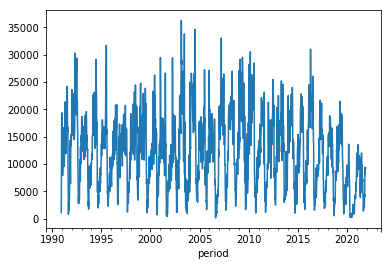

In [13]:
sorted_data['inc'].plot()

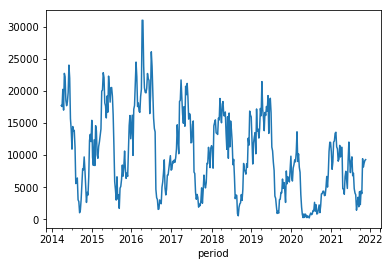

In [20]:
 sorted_data['inc'][-400:].plot()